# Ejercicio: Obtener número de elementos de una imagen

Para resolver el ejercicio hay que rellenar el código que falta en las celdas correspondientes. Responda también las preguntas del ejercicio.

## Importa las librerías opencv, numpy y matplotlib

In [1]:
# Importa opencv
# Importa numpy
# Importa matplotlib
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Lee y visualiza la imagen Circulos.png (imagen a color)

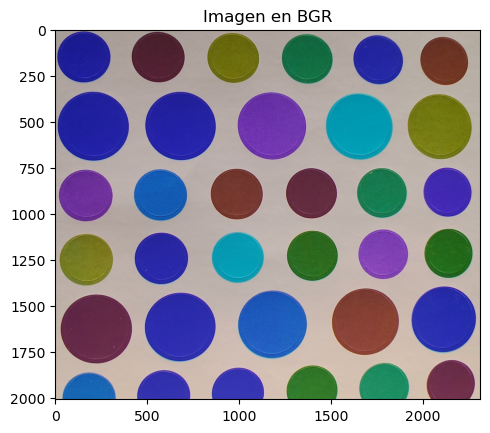

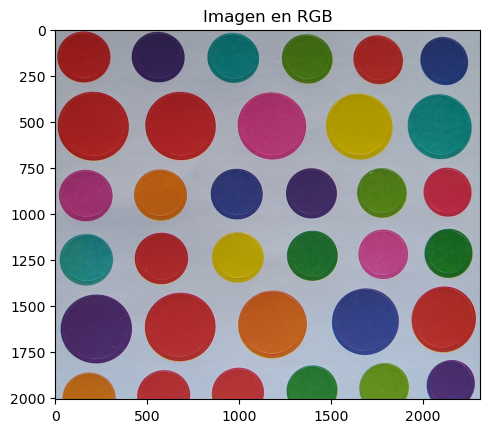

In [2]:
# Lee imagen
imgBGR = cv.imread('Circulos.png')
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB) 
# Visualiza imagen
plt.figure()
plt.title("Imagen en BGR")
plt.imshow(imgBGR)
plt.figure()
plt.title("Imagen en RGB")
plt.imshow(imgRGB)

# Selecciona un canal para segmentar los círculos y trozos de círculo

Elige qué espacio de color y canal es el más adecuado para crear una máscara de estos elementos. Prueba con los espacios de color RGB y YUV. También con el espacio de color HSV (_Hue, Saturation, Value_; Matiz, Saturación, Valor). Para cambiar de espacio de color usa la función de OpenCV [cv.cvtColor](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab). Puede resultarte útil construir una figura con la imagen a color y los tres canales, y en otra figura visualizar la máscara al segmentar con Otsu un determinado canal.

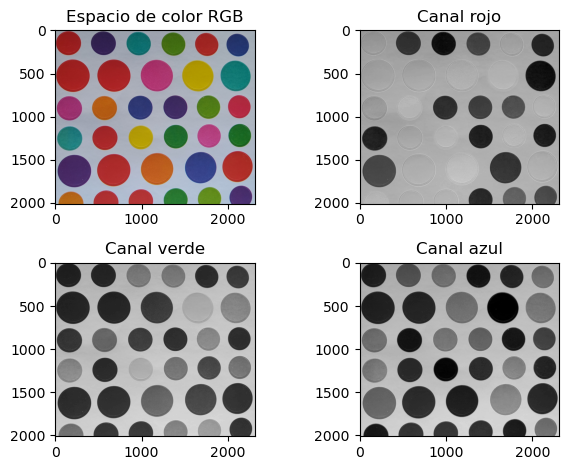

In [3]:
# Espacio de color RGB
imgB = imgBGR[:,:,0]
imgG = imgBGR[:,:,1]
imgR = imgBGR[:,:,2]

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(imgRGB)
axs[0,0].set(title = 'Espacio de color RGB')
axs[0,1].imshow(imgR, cmap='gray')
axs[0,1].set(title = 'Canal rojo')
axs[1,0].imshow(imgG, cmap='gray')
axs[1,0].set(title = 'Canal verde')
axs[1,1].imshow(imgB, cmap='gray')
axs[1,1].set(title = 'Canal azul')
fig.tight_layout()

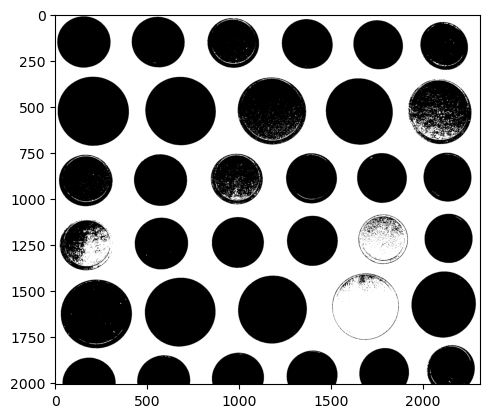

In [4]:
#El canal donde se ven mejor todos los circulos es el azul
canal_RGB = imgB # Canal a segmentar
ret_RGB,mask_RGB = cv.threshold(canal_RGB,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) # Segmentación de Otsu
plt.imshow(mask_RGB, cmap='gray')

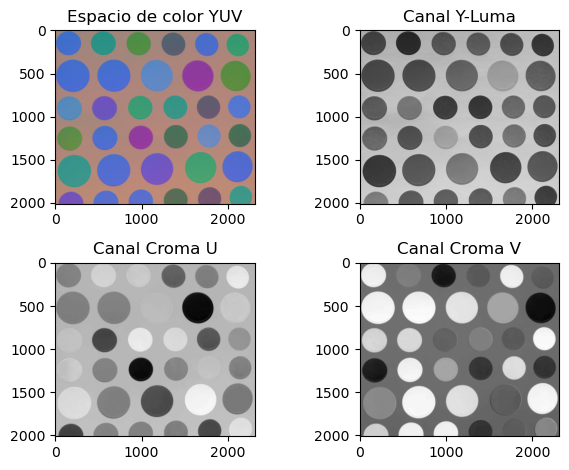

In [5]:
# Espacio de color YUV
imgYUV = cv.cvtColor(imgBGR, cv.COLOR_BGR2YUV)
imgY = imgYUV[:,:,0] #Luminancia de la imagen
imgU = imgYUV[:,:,1] #Crominancia azul - diferencia
imgV = imgYUV[:,:,2] #Crominancia rojo - diferencia

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(imgYUV)
axs[0,0].set(title = 'Espacio de color YUV')
axs[0,1].imshow(imgY, cmap='gray')
axs[0,1].set(title = 'Canal Y-Luma')
axs[1,0].imshow(imgU, cmap='gray')
axs[1,0].set(title = 'Canal Croma U')
axs[1,1].imshow(imgV, cmap='gray')
axs[1,1].set(title = 'Canal Croma V')
fig.tight_layout()

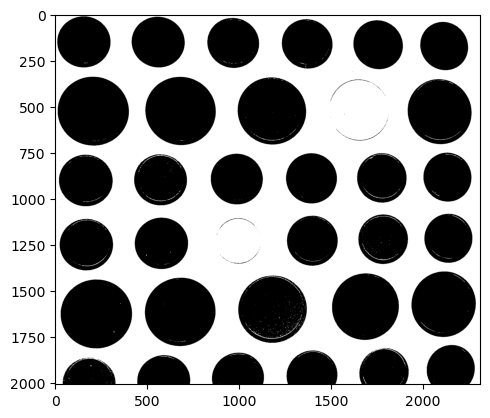

In [6]:
#El canal donde mejor se aprecian los circulos es el Y
canal_YUV = imgYUV[:,:,0] # Canal a segmentar
ret_YUB,mask_YUV = cv.threshold(canal_YUV,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) # Segmentación de Otsu
plt.imshow(mask_YUV, cmap='gray')

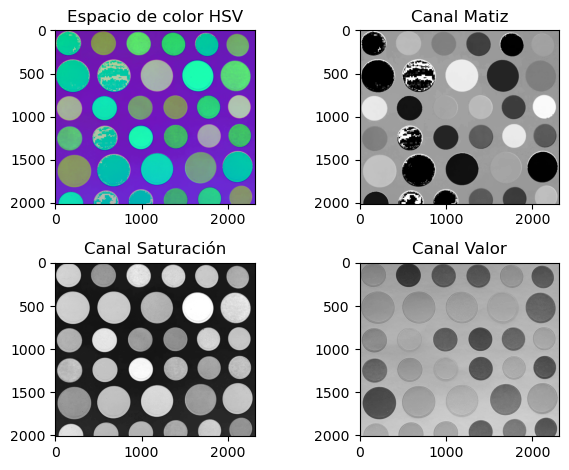

In [7]:
# Espacio de color HSV
imgHSV = cv.cvtColor(imgBGR, cv.COLOR_BGR2HSV)
imgH = imgHSV[:,:,0] #Matiz
imgS = imgHSV[:,:,1] #Saturacion
imgV_HSV = imgHSV[:,:,2] #Valor de brillo

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(imgHSV)
axs[0,0].set(title = 'Espacio de color HSV')
axs[0,1].imshow(imgH, cmap='gray')
axs[0,1].set(title = 'Canal Matiz')
axs[1,0].imshow(imgS, cmap='gray')
axs[1,0].set(title = 'Canal Saturación')
axs[1,1].imshow(imgV_HSV, cmap='gray')
axs[1,1].set(title = 'Canal Valor')
fig.tight_layout()

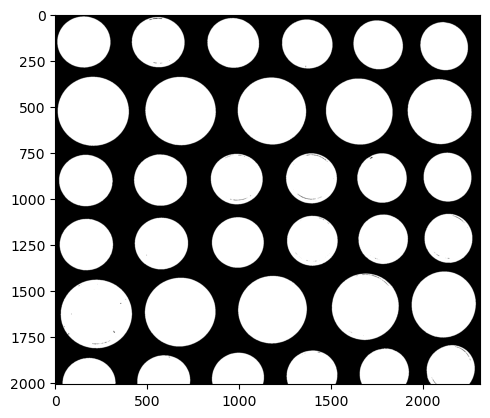

In [8]:
#El canal donde mejor se aprecian los circulos es el de saturacion
canal_HSV = imgHSV[:,:,1] # Canal a segmentar
ret_HSV,mask_HSV = cv.threshold(canal_HSV,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU) # Segmentación de Otsu
plt.imshow(mask_HSV, cmap='gray')

**¿Qué canal da mejores resultados?** 

Para los siguientes apartados hay que ejecutar la celda con el canal elegido para que la variable _mask_ sea correcta.

## Obtén el número de elementos

Para realizar este procesado vamos a utilizar la función de opencv [_connectedComponentsWithStats_](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f). Esta función permite etiquetar con la misma etiqueta los píxeles contiguos con el mismo valor.

_Connectivity=8_ permite conectar píxeles en horizontal, vertical y diagonal.

In [9]:
n_labels_RGB, labels_RGB, stats_RGB, centroids_RGB = cv.connectedComponentsWithStats(mask_RGB, connectivity=8)
n_labels_YUV, labels_YUV, stats_YUV, centroids_YUV = cv.connectedComponentsWithStats(mask_YUV, connectivity=8)
n_labels_HSV, labels_HSV, stats_HSV, centroids_HSV = cv.connectedComponentsWithStats(mask_HSV, connectivity=8)

**¿Qué significan las variables que devuelve esta función?**
* n_labels: numero de componentes detectados por el algoritmo
* labels: etiqueta con un entero cada componente con el pixel
* stats: estadisticas de cada componente, incluyendo areas no conectadas a ningun componente
* centroids: matriz que contiene las coordenadas x,y de cada componente

Utiliza la función de OpenCV [_putText_](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576) para escribir la etiqueta de cada elemento (en amarillo) en la imagen RGB. Los valores de las siguientes variables de entrada de esta función serían:
* fontFace: cv.FONT_HERSHEY_SIMPLEX
* fontScale: 2
* thickness: 5

Importante: 
* La función _putText_ sobreescribe la imagen. Así que es conveniente crear al principio una nueva variable que sea una copia de la imagen RGB. 
* Las coordenadas de dónde colocar el texto deben ser de tipo int64.
* En síntesis aditiva el amarillo se consigue con rojo y verde.

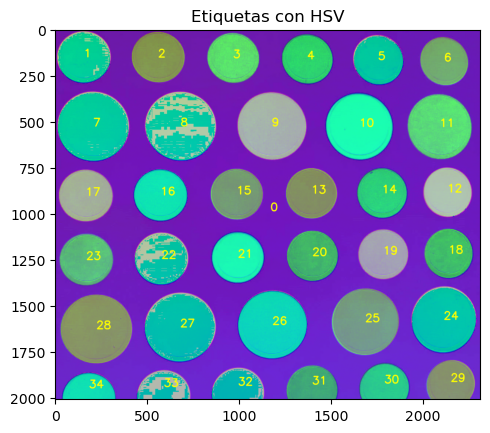

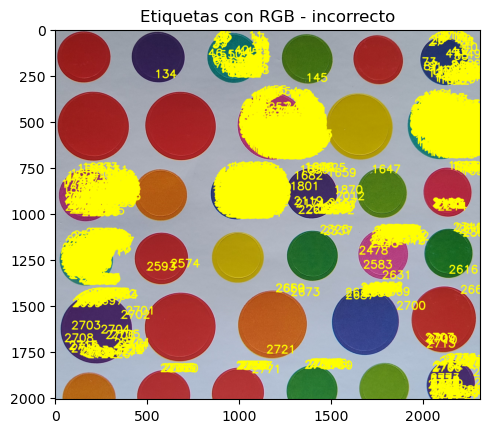

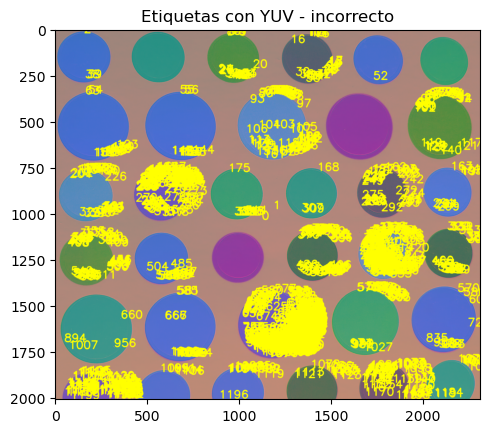

In [10]:
#MÁSCARA CORRECTA - HSV#

imgRGB_etiquetada_HSV = imgHSV
centroidsInt_HSV = np.int64(centroids_HSV)
# Introducir dos líneas de código para realizar un bucle que añada la etiqueta de cada elemento en la imagen RGB
for index in range(0,n_labels_HSV): 
    imgRGB_etiquetada_HSV = cv.putText(imgRGB_etiquetada_HSV, str(index), (centroidsInt_HSV[index,0],centroidsInt_HSV[index,1]), cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,0), 5)
plt.figure()
plt.title("Etiquetas con HSV") 
plt.imshow(imgRGB_etiquetada_HSV)

#MÁSCARAS INCORRECTAS - RGB Y YUV#
imgRGB_etiquetada_RGB = imgRGB
centroidsInt_RGB = np.int64(centroids_RGB)
# Introducir dos líneas de código para realizar un bucle que añada la etiqueta de cada elemento en la imagen RGB
for index in range(0,n_labels_RGB): 
    imgRGB_etiquetada_RGB = cv.putText(imgRGB_etiquetada_RGB, str(index), (centroidsInt_RGB[index,0],centroidsInt_RGB[index,1]), cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,0), 5)
plt.figure()
plt.title("Etiquetas con RGB - incorrecto")    
plt.imshow(imgRGB_etiquetada_RGB)

imgRGB_etiquetada_YUV = imgYUV
centroidsInt_YUV = np.int64(centroids_YUV)
# Introducir dos líneas de código para realizar un bucle que añada la etiqueta de cada elemento en la imagen RGB
for index in range(0,n_labels_YUV): 
    imgRGB_etiquetada_YUV = cv.putText(imgRGB_etiquetada_YUV, str(index), (centroidsInt_YUV[index,0],centroidsInt_YUV[index,1]), cv.FONT_HERSHEY_SIMPLEX, 2, (255,255,0), 5)
plt.figure()
plt.title("Etiquetas con YUV - incorrecto") 
plt.imshow(imgRGB_etiquetada_YUV)

**¿Qué representa la región con la etiqueta 0?** 
La región con la etiqueta 0 representa el fondo

**¿Cuántos círculos o trozos de círculos tiene la imagen?**
Gracias al espacio de color HSV se consiguen distinguir 34 círculos.

## Transformada de distancia

Calcula la transformada de distancia de la máscara obtenida con la función de OpenCV [_distanceTransform_](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ga8a0b7fdfcb7a13dde018988ba3a43042). Los parámetros de esta función serían los siguientes:
* distanceType: cv.DIST_L2
* maskSize: cv.DIST_MASK_PRECISE

Dibuja el array numpy con las distancias calculadas

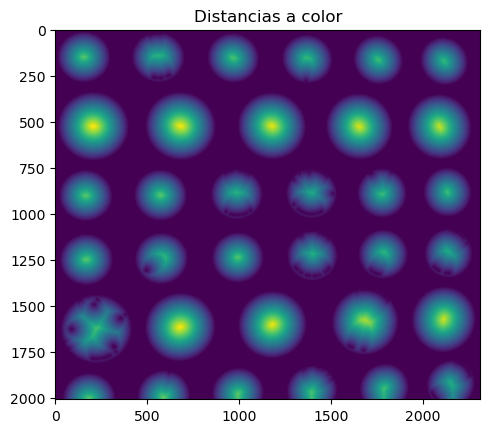

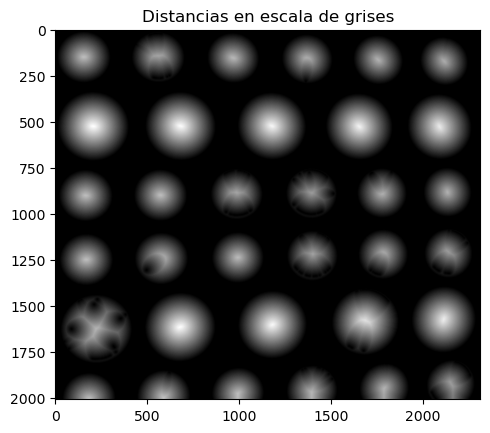

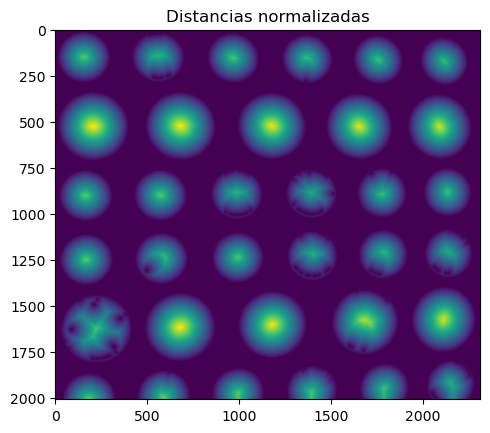

In [11]:
#Para la transformada de la distancia hay que utilizar la mascara obtenida con OTSU
distancias = cv.distanceTransform(mask_HSV,cv.DIST_L2,cv.DIST_MASK_PRECISE)
distancias_normalizadas = cv.normalize(distancias, None, 0, 1, cv.NORM_MINMAX)

plt.figure()
plt.title("Distancias a color")
plt.imshow(distancias)
plt.figure()
plt.title("Distancias en escala de grises")
plt.imshow(distancias, cmap="gray")

#Preguntar por qué en internet sugiere normalizar si la imagen se ve aparentemente igual
plt.figure()
plt.title("Distancias normalizadas")
plt.imshow(distancias_normalizadas)

**¿Para qué podrían servir las distancias calculadas? ¿Por qué hay regiones con forma no simétrica? ¿Cómo se solucionaría?** 

La transformada de la distancia puede ser útil para segmentación de objetos y análisis de contornos de figuras.

Puede haber regiones con forma no simétrica porque al utilizar las métricas para hacer la transformada de la distancia pueden producirse errores de aproximación.
Al utilizar DIST_MASK_PRECISE y la distancia euclídea (DIST_L2), el algoritmo utilizado es el descrito por Pedro Felzenszwalb y Daniel Huttenlocher en la obra Distance transforms of sampled functions. Technical report, Cornell University, 2004.